### Importar las librerías

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Crear el dataframe 


In [55]:
train = pd.read_csv("student.csv")
train.head()

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Unknown,84,77,65,65,80,74,76


### Obtengo información del dataset como la cantidad de columnas y los tipos de datos

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          2000 non-null   int64 
 1   first_name                  2000 non-null   object
 2   last_name                   2000 non-null   object
 3   email                       2000 non-null   object
 4   gender                      2000 non-null   object
 5   part_time_job               2000 non-null   bool  
 6   absence_days                2000 non-null   int64 
 7   extracurricular_activities  2000 non-null   bool  
 8   weekly_self_study_hours     2000 non-null   int64 
 9   career_aspiration           2000 non-null   object
 10  math_score                  2000 non-null   int64 
 11  history_score               2000 non-null   int64 
 12  physics_score               2000 non-null   int64 
 13  chemistry_score             2000 non-null   int6

#### Dimensiones 

In [57]:
train.shape

(2000, 17)

#### Observo si hay valores nulos

In [58]:
train.isnull().sum()

id                            0
first_name                    0
last_name                     0
email                         0
gender                        0
part_time_job                 0
absence_days                  0
extracurricular_activities    0
weekly_self_study_hours       0
career_aspiration             0
math_score                    0
history_score                 0
physics_score                 0
chemistry_score               0
biology_score                 0
english_score                 0
geography_score               0
dtype: int64

#### Creo una columna con el promedio de todas las calificaciones

In [59]:
train["average_score"] = train[["math_score", "history_score", "physics_score", "chemistry_score", "biology_score", "english_score", "geography_score"]].mean(axis=1)


In [60]:
train.columns

Index(['id', 'first_name', 'last_name', 'email', 'gender', 'part_time_job',
       'absence_days', 'extracurricular_activities', 'weekly_self_study_hours',
       'career_aspiration', 'math_score', 'history_score', 'physics_score',
       'chemistry_score', 'biology_score', 'english_score', 'geography_score',
       'average_score'],
      dtype='object')

##### Cambio el promedio al tipo int

In [61]:
train["average_score"] = train["average_score"].astype(int)

#### Selecciono las columnas que voy a utilizar

In [68]:
train[['weekly_self_study_hours', 'average_score']].head(10)

,weekly_self_study_hours,average_score
0,27,82
1,47,91
2,13,86
3,3,78
4,10,74
5,26,82
6,23,84
7,34,82
8,25,81
9,18,76


### Gráfico de dispersión de los datos

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_8948\884930833.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


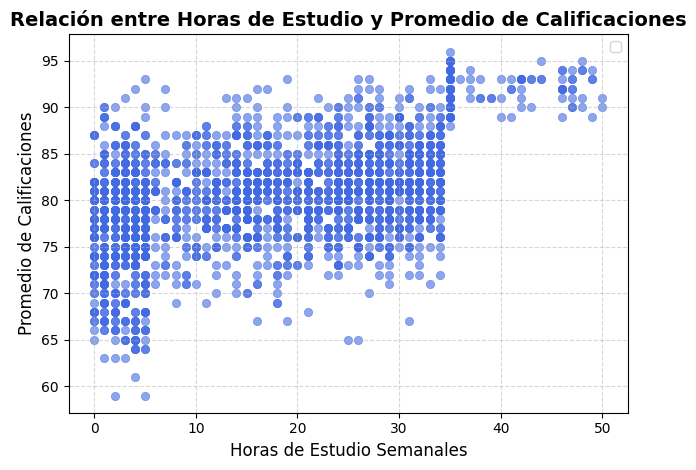

In [101]:
plt.scatter(train['weekly_self_study_hours'], train['average_score'],
            color='royalblue', alpha=0.6,  linewidths=0.5)

plt.title("Relación entre Horas de Estudio y Promedio de Calificaciones", fontsize=14, fontweight='bold')
plt.xlabel("Horas de Estudio Semanales", fontsize=12)
plt.ylabel("Promedio de Calificaciones", fontsize=12)
plt.grid(True, alpha=0.5, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

### Creamos el modelo

In [46]:
modelo = LinearRegression()

### Entrenamos el modelo siendo x las horas de estudio y la y el promedio de sus calificaciones

In [47]:
modelo.fit(train[["weekly_self_study_hours"]], train[["average_score"]])

LinearRegression()

### Predecimos

In [48]:
train["weekly_self_study_hours"].max()

np.int64(50)

In [49]:
int(modelo.predict([[50]]))

c:\Users\IPF-2025\Desktop\TLP_PYTHON\TP-SCIKI-LEARN\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_8948\1382279779.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(modelo.predict([[50]]))


88

In [70]:
train[train['weekly_self_study_hours'] == 50][['weekly_self_study_hours', 'average_score']]


,weekly_self_study_hours,average_score
734,50,90
1623,50,91


### Guardar modelo

In [71]:
import joblib
joblib.dump(modelo, 'student_reg_model.pkl')

['student_reg_model.pkl']

### Cargar modelo

In [72]:
reg = joblib.load('student_reg_model.pkl')

In [73]:
int(reg.predict([[50]]))

c:\Users\IPF-2025\Desktop\TLP_PYTHON\TP-SCIKI-LEARN\env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_8948\2033025761.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  int(reg.predict([[50]]))


88

### Calcula el Error Cuadrático Medio

In [75]:
from sklearn.metrics import mean_squared_error

### Evalua el conjunto de entrenamiento

In [78]:
y_predic = reg.predict(train[['weekly_self_study_hours']])
mse = mean_squared_error(train['average_score'], y_predic)
print(f'El error cuadrático medio es:{mse}')

El error cuadrático medio es:27.436658507176254


### Gráfico de los datos

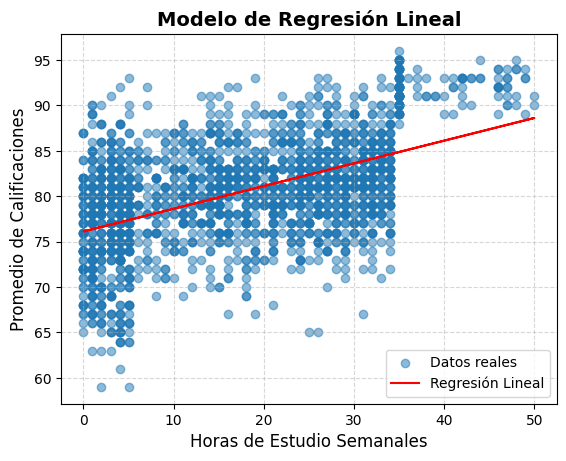

In [99]:
plt.scatter(train["weekly_self_study_hours"], train["average_score"], label="Datos reales", alpha=0.5)
plt.plot(train["weekly_self_study_hours"],y_predic, color='red', label="Regresión Lineal")
plt.xlabel("Horas de Estudio Semanales", fontsize=12)
plt.ylabel("Promedio de Calificaciones", fontsize=12)
plt.title("Modelo de Regresión Lineal", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.5, linestyle='--')
plt.show()
